<a href="https://colab.research.google.com/github/kiran-bhandari16/Predict-Stock-Prices-Using-Random-Forest-Regression-Model/blob/main/Predict_Stock_Prices_Using_Random_Forest_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [56]:
from google.colab import files
uploaded = files.upload()

Saving updated-sbl-data.csv to updated-sbl-data (1).csv


In [112]:
df = pd.read_csv("updated-sbl-data.csv")
df.head()

,Date,Open,High,Low,Ltp,Turnover
0,2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
1,2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2,2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
3,2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
4,2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


In [113]:
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Ltp,Turnover
Date,,,,,
2022-06-29,318.90,318.90,310.00,315.00,"6,127,716.20"
2022-06-28,312.00,316.50,306.00,313.00,"5,707,986.70"
2022-06-27,322.00,325.00,310.00,312.00,"11,125,995.50"
2022-06-26,312.90,320.00,308.00,320.00,"28,577,745.10"
2022-06-24,305.00,310.00,298.20,307.00,"25,399,389.80"


In [114]:
df['Ltp'].dtypes

dtype('O')

In [115]:
# df = df.apply( pd.to_numeric, errors='coerce' )

In [116]:
df.dtypes

Open        object
High        object
Low         object
Ltp         object
Turnover    object
dtype: object

In [117]:
df["Ltp"].head()

Date
2022-06-29    315.00
2022-06-28    313.00
2022-06-27    312.00
2022-06-26    320.00
2022-06-24    307.00
Name: Ltp, dtype: object

In [118]:
df["Ltp"] = df["Ltp"].str.replace(",","")
ltp = df["Ltp"].apply(lambda x: float(x))
df["Ltp"]=df["Ltp"].apply(pd.to_numeric)

In [119]:
df["Open"] = df["Open"].str.replace(",","")
open = df["Open"].apply(lambda x: float(x))

In [120]:
df["High"] = df["High"].str.replace(",","")
high = df["High"].apply(lambda x: float(x))

In [121]:
df["Low"] = df["Low"].str.replace(",","")
low = df["Low"].apply(lambda x: float(x))

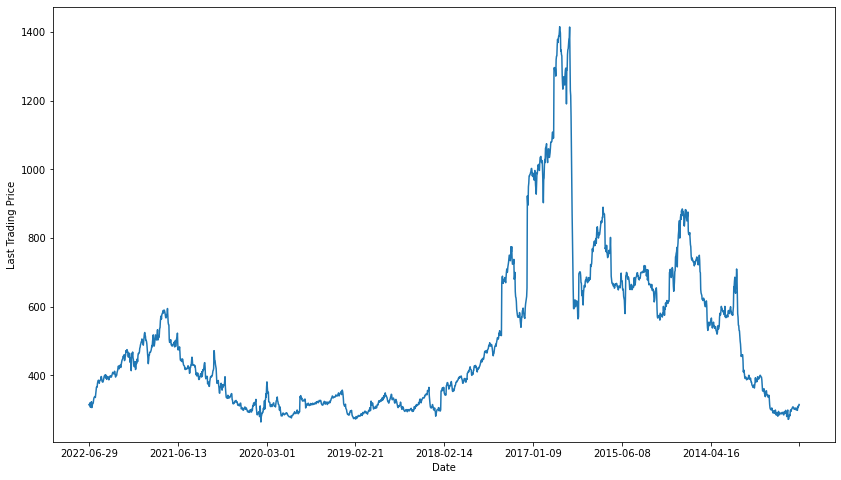

In [122]:
df['Ltp'].plot(figsize=(14,8))
plt.ylabel("Last Trading Price")
plt.show()

**Data pre-processing**

In [123]:
#null value check
df.isna().sum() 

Open        0
High        0
Low         0
Ltp         0
Turnover    0
dtype: int64

In [124]:
df["Ltp"].value_counts()

300.0     29
315.0     21
305.0     21
290.0     19
395.0     18
          ..
1416.0     1
1400.0     1
438.0      1
1378.0     1
498.8      1
Name: Ltp, Length: 632, dtype: int64

In [125]:
df.value_counts()

Open     High     Low      Ltp     Turnover      
651.00   685.00   664.00   675.0   6,869,330.00      3
845.00   890.00   830.00   870.0   13,680,051.00     2
701.00   701.00   694.00   700.0   5,283,653.00      2
608.00   622.00   610.00   620.0   5,295,651.00      2
1345.00  1404.00  1350.00  1399.0  121,941,184.00    2
                                                    ..
330.00   330.00   327.00   328.0   8,528,733.00      1
                  326.00   326.0   4,394,545.00      1
329.00   332.00   327.00   330.0   28,701,214.00     1
         329.00   326.00   327.0   13,637,949.00     1
997.00   1015.00  993.00   1000.0  20,908,958.00     1
Length: 1992, dtype: int64

In [126]:
df.head()

,Open,High,Low,Ltp,Turnover
Date,,,,,
2022-06-29,318.90,318.90,310.00,315.0,"6,127,716.20"
2022-06-28,312.00,316.50,306.00,313.0,"5,707,986.70"
2022-06-27,322.00,325.00,310.00,312.0,"11,125,995.50"
2022-06-26,312.90,320.00,308.00,320.0,"28,577,745.10"
2022-06-24,305.00,310.00,298.20,307.0,"25,399,389.80"


In [129]:
df.drop("Turnover", axis=1, inplace=True)

In [130]:
df.head()

,Open,High,Low,Ltp
Date,,,,
2022-06-29,318.90,318.90,310.00,315.0
2022-06-28,312.00,316.50,306.00,313.0
2022-06-27,322.00,325.00,310.00,312.0
2022-06-26,312.90,320.00,308.00,320.0
2022-06-24,305.00,310.00,298.20,307.0


In [131]:
df.isna().sum()

Open    0
High    0
Low     0
Ltp     0
dtype: int64

**Feature selection**

In [132]:
df.tail()

,Open,High,Low,Ltp
Date,,,,
2013-03-21,306.00,311.00,303.00,308.0
2013-03-20,312.00,312.00,306.00,306.0
2013-03-19,311.00,312.00,309.00,312.0
2013-03-18,315.00,317.00,305.00,311.0
2013-03-17,321.00,320.00,310.00,315.0


In [133]:
x = df.iloc[:, 0:4].values

In [134]:
x

array([['318.90', '318.90', '310.00', 315.0],
       ['312.00', '316.50', '306.00', 313.0],
       ['322.00', '325.00', '310.00', 312.0],
       ...,
       ['311.00', '312.00', '309.00', 312.0],
       ['315.00', '317.00', '305.00', 311.0],
       ['321.00', '320.00', '310.00', 315.0]], dtype=object)

In [135]:
y = df.iloc[:, 3].values

In [136]:
y

array([315., 313., 312., ..., 312., 311., 315.])

x is holding values for the open, high, low, ltp columns and y is holding the value of ltp columns

**Divide into train and test datasets**

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=0)

**Scaling the features**

In [139]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**Hyperparemater tuning**

For a random forest regression model, we are considering the follwing parameters:

n_estimators — number of trees in the forest <br>
max_depth — maximum depth in a tree <br>
min_samples_split — minimum number of data points before the sample is split <br>
min_samples_leaf — minimum number of leaf nodes that are required to be sampled <br>
bootstrap — sampling for data points, true or false <br>
random_state — generated random numbers for the random forest. <br>

In [141]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=10, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(X_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
{'random_state': 2, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 14, 'bootstrap': False}


**Apply model and predict**

In [143]:
model = RandomForestRegressor(n_estimators=100, random_state=2, min_samples_split=2, min_samples_leaf=1, max_depth=14, bootstrap=False)
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [144]:
print(predict)

[ 320.     777.39   485.     284.     540.     701.     655.96  1080.
  400.     336.    1009.53   698.5    523.     507.596  312.     355.
  292.     290.     698.5    582.1    348.     893.     317.     645.
  419.    1101.1    288.     500.     309.     289.     954.75   444.
  290.     555.     391.     319.     358.64   520.     304.     363.68
  386.039 1398.23   980.47   338.     592.27   319.     379.     445.658
  601.     479.72   678.    1398.23   400.     294.     428.     320.
  288.     587.777  355.     701.     323.     653.11   447.53   601.
  392.     325.     304.     587.426  323.     466.     419.     301.
  472.     730.     397.     577.     442.56   504.     536.95   675.
  319.     473.53   333.     674.     740.29   440.     620.     447.53
  289.     406.     393.     366.     496.211  850.3    664.     315.
  295.     412.28   390.     445.781  303.    1032.27   308.     650.
  382.     294.     490.     601.    1014.13   317.     339.     638.67
  290.     

In [145]:
print(predict.shape)

(400,)


In [146]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.9142
Mean Squared Error: 20.7029
Root Mean Squared Error: 4.55
(R^2) Score: 0.9996
Train Score : 100.00% and Test Score : 99.96% using Random Tree Regressor.
Accuracy: 99.9 %.


The lower the value of **RMSE**, the better the performance. RMSE value that is greater than 0.5 reflects the poor ability of the model to predict the data accurately. The model will predict more accurate data when the RMSE value is less than 0.5 and greater than 0.3. <br>


**Mean absolute error (MEA)** 


*   measures the average magnitude of the errors in a set of predictions without considering their direction.
*   It is the average absolute difference between the prediction and the actual observation where all individual differences have equal weight.

*    The lower the values, the better.

<br>

**Mean squared error (MSE)** takes the sum of the absolute value of error. The lower the MSE value, the higher the prediction accuracy. <br>

**The R squared** indicates how well a model fits a given dataset. It indicates how close the regression line is, that is, the plotted predicted and actual values. 





**Collect future days from predicted values and plot**

In [166]:
df.index

Index(['2022-06-29', '2022-06-28', '2022-06-27', '2022-06-26', '2022-06-24',
       '2022-06-23', '2022-06-22', '2022-06-21', '2022-06-20', '2022-06-19',
       ...
       '2013-03-31', '2013-03-28', '2013-03-27', '2013-03-25', '2013-03-24',
       '2013-03-21', '2013-03-20', '2013-03-19', '2013-03-18', '2013-03-17'],
      dtype='object', name='Date', length=2000)

In [168]:
df.index[0]

'2022-06-29'

In [180]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))

In [181]:
predictions

,Predictions
2013-03-17,320.00
2013-03-18,777.39
2013-03-19,485.00
2013-03-20,284.00
2013-03-21,540.00
...,...
2014-04-16,321.00
2014-04-17,377.00
2014-04-18,580.00
2014-04-19,536.66


In [182]:
twodays_df_pred = pd.DataFrame(predictions[:2])

In [183]:
twodays_df_pred

,Predictions
2013-03-17,320.00
2013-03-18,777.39


In [184]:
twodays_df_pred.set_index(twodays_df_pred.index, inplace=True)

In [185]:
twodays_df_pred

,Predictions
2013-03-17,320.00
2013-03-18,777.39


In [186]:
buy_price = min(twodays_df_pred["Predictions"])
sell_price = max(twodays_df_pred["Predictions"])


In [187]:
buy_price

320.0

In [188]:
sell_price

777.39

In [189]:
twodays_buy = twodays_df_pred.loc[twodays_df_pred["Predictions"] == buy_price]
twodays_sell = twodays_df_pred.loc[twodays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(twodays_buy)
print("Sell price and date")
print(twodays_sell)


Buy price and date
            Predictions
2013-03-17        320.0
Sell price and date
            Predictions
2013-03-18       777.39


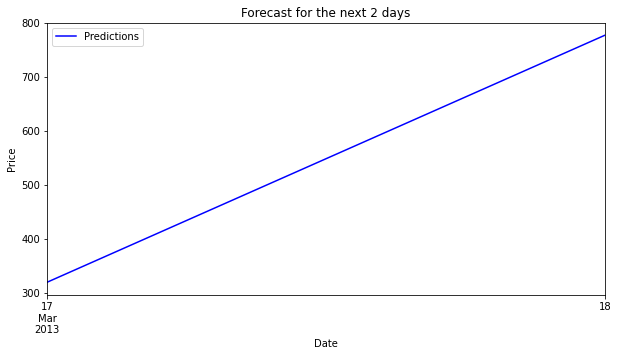

In [190]:
twodays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 2 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()